In [16]:
import pandas as pd
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

In [64]:
path_1 = "prompt_template_1.csv"
path_2 = "prompt_template_2.csv"
# path_3 = "model_outputs.csv"
# path_4 = "model_outputs_1.csv"
# path_5 = "model_outputs_2.csv"



In [65]:
df_1 = pd.read_csv(path_1, sep=';')
df_2 = pd.read_csv(path_2, sep=';')

In [66]:
df_2["chatGPT-4"]=None

In [73]:
df_2.loc[4, "chatGPT-4"] ="""
<BehaviorTree>
    <Sequence>
        <Action>form_line</Action>
        <Action>change_color_to_green</Action>
        <Action>agent_movement_freeze</Action>
    </Sequence>
</BehaviorTree>
"""

In [79]:
df_2.to_csv('prompt_template_2_with_GPT4.csv', sep=';', index=False)

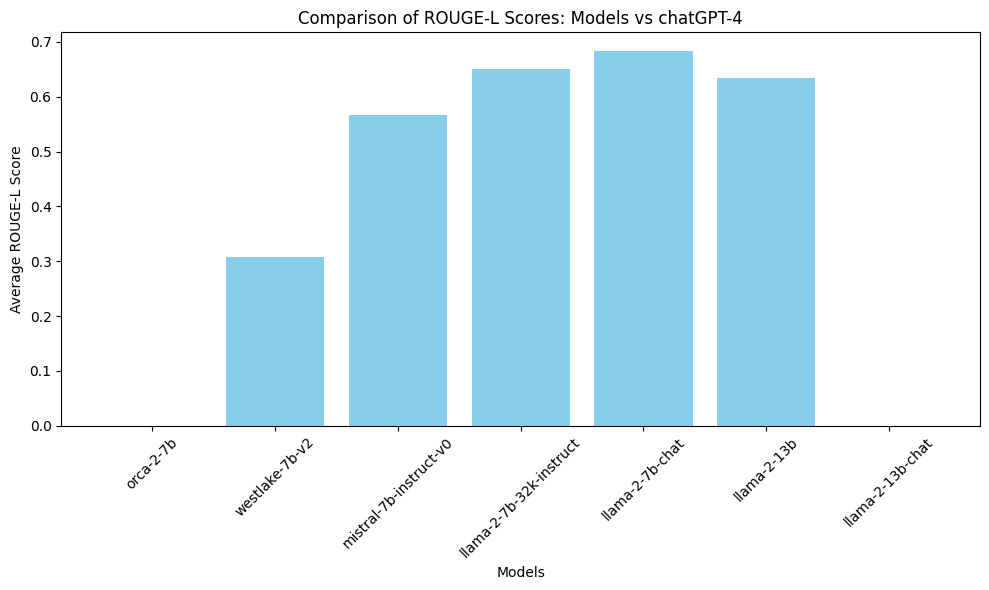

In [81]:

# Load the data
df = pd.read_csv('vis_propmt_1.csv', sep=';')

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Function to calculate ROUGE-L between a specific column and the chatGPT-4 column
def calculate_rouge(row, model_name):
    try:
        scores = scorer.score(row[model_name], row['chatGPT-4'])
        return scores['rougeL'].fmeasure  # Returning the F-measure of ROUGE-L
    except:
        return None

# List of model columns to compare with chatGPT-4
model_columns = ['orca-2-7b', 'westlake-7b-v2', 'mistral-7b-instruct-v0', 'llama-2-7b-32k-instruct', 'llama-2-7b-chat', 'llama-2-13b', 'llama-2-13b-chat']

# Calculate ROUGE-L for each model comparison with chatGPT-4
for model in model_columns:
    df[f'ROUGE-L_{model}_vs_chatGPT-4'] = df.apply(calculate_rouge, axis=1, model_name=model)

# Plotting
rouge_scores = [df[f'ROUGE-L_{model}_vs_chatGPT-4'].mean() for model in model_columns]
plt.figure(figsize=(10, 6))
plt.bar(model_columns, rouge_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average ROUGE-L Score')
plt.title('Comparison of ROUGE-L Scores: Models vs chatGPT-4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


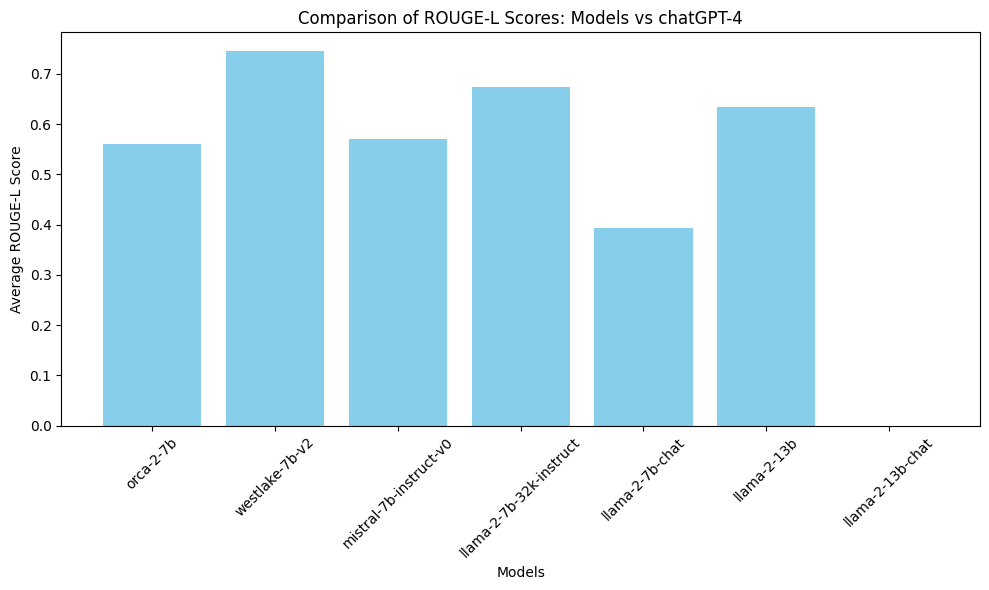

In [85]:

# Load the data
df = pd.read_csv('vis_propmt_2.csv', sep=';')

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Function to calculate ROUGE-L between a specific column and the chatGPT-4 column
def calculate_rouge(row, model_name):
    try:
        scores = scorer.score(row[model_name], row['chatGPT-4'])
        return scores['rougeL'].fmeasure  # Returning the F-measure of ROUGE-L
    except:
        return None

# List of model columns to compare with chatGPT-4
model_columns = ['orca-2-7b', 'westlake-7b-v2', 'mistral-7b-instruct-v0', 'llama-2-7b-32k-instruct', 'llama-2-7b-chat', 'llama-2-13b', 'llama-2-13b-chat']

# Calculate ROUGE-L for each model comparison with chatGPT-4
for model in model_columns:
    df[f'ROUGE-L_{model}_vs_chatGPT-4'] = df.apply(calculate_rouge, axis=1, model_name=model)

# Plotting
rouge_scores = [df[f'ROUGE-L_{model}_vs_chatGPT-4'].mean() for model in model_columns]
plt.figure(figsize=(10, 6))
plt.bar(model_columns, rouge_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average ROUGE-L Score')
plt.title('Comparison of ROUGE-L Scores: Models vs chatGPT-4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

